### Simulate Normalization, Standardization etc.
simulate:
- normal distribution
- random distribution
- left skewness, right skewness

In [4]:
import numpy as np
from sklearn.preprocessing import Normalizer, StandardScaler
from scipy.stats import percentileofscore

# generate random data set
np.random.seed(42)
n_rows = 15
n_columns = 2 


X_random_dist = np.random.randint(0, 42, size=(n_rows, n_columns))
X_normal_dist = np.random.normal(loc=0, scale=1, size=(n_rows, n_columns))
X_left_skewed = np.random.lognormal(mean=0, sigma=1, size=(n_rows, n_columns))

def transform_data(X):
    # normalize data set
    normalizer = Normalizer()
    X_normalized = normalizer.fit_transform(X)

    # standartize data set
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # estimate percentile column-wise
    X_percentiles = np.zeros_like(X, dtype=float)
    for col in range(X.shape[1]):
        X_percentiles[:, col] = [percentileofscore(X[:, col], value) for value in X[:, col]]
    
    return X, X_normalized, X_scaled, X_percentiles

random_dist = transform_data(X_random_dist)
normal_dist = transform_data(X_normal_dist)
left_skewed = transform_data(X_left_skewed)


In [5]:
print('Initial: \n', random_dist[0])
print('Normalized: \n', random_dist[1])
print('Standardized: \n', random_dist[2])
print('Percentiles: \n', random_dist[3])

Initial: 
 [[38 28]
 [14  7]
 [20 38]
 [18 22]
 [10 10]
 [23 35]
 [39 23]
 [ 2 21]
 [ 1 23]
 [29 37]
 [ 1 20]
 [32 11]
 [21 24]
 [26 41]
 [27 15]]
Normalized: 
 [[0.80505584 0.59319904]
 [0.89442719 0.4472136 ]
 [0.46574643 0.88491822]
 [0.63323779 0.7739573 ]
 [0.70710678 0.70710678]
 [0.54917789 0.83570548]
 [0.8613659  0.50798502]
 [0.09480909 0.99549547]
 [0.04343722 0.99905616]
 [0.61688166 0.78705592]
 [0.04993762 0.99875234]
 [0.9456866  0.32507977]
 [0.65850461 0.75257669]
 [0.53554203 0.84450858]
 [0.87415728 0.48564293]]
Standardized: 
 [[ 1.48385707  0.42555528]
 [-0.50197395 -1.63675109]
 [-0.0055162   1.40760594]
 [-0.17100212 -0.16367511]
 [-0.83294579 -1.3421359 ]
 [ 0.24271268  1.11299074]
 [ 1.56660002 -0.06547004]
 [-1.49488946 -0.26188017]
 [-1.57763242 -0.06547004]
 [ 0.73917043  1.30940087]
 [-1.57763242 -0.36008524]
 [ 0.98739931 -1.24393083]
 [ 0.07722676  0.03273502]
 [ 0.49094156  1.70222114]
 [ 0.57368452 -0.85111057]]
Percentiles: 
 [[ 93.33333333  73.3333333

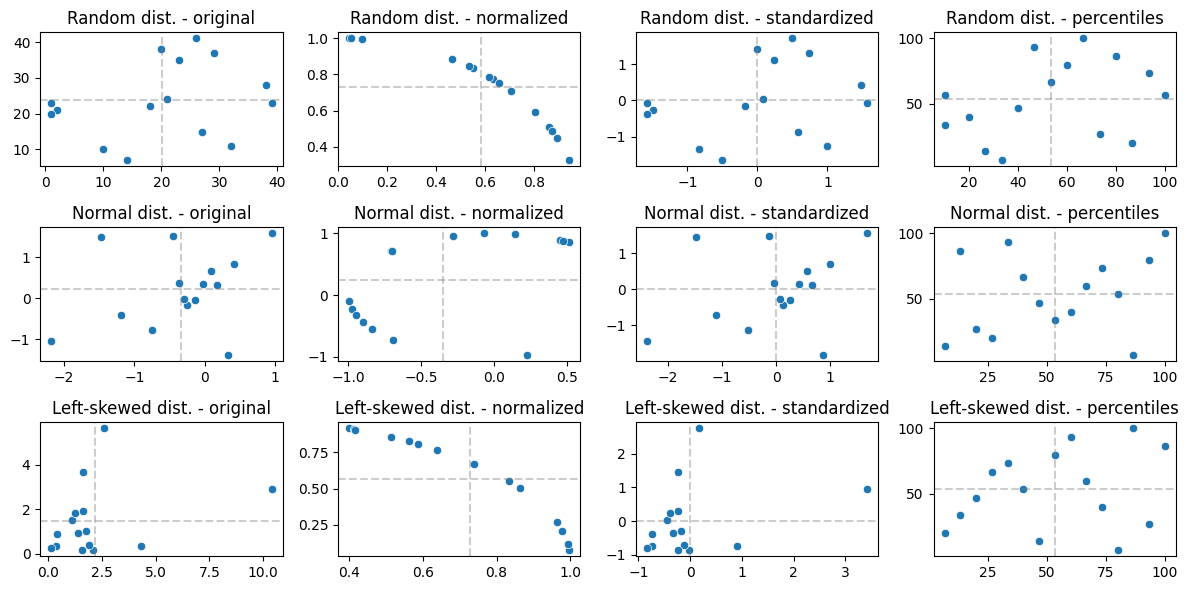

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

methods = ['original', 'normalized', 'standardized', 'percentiles']

fig, axes = plt.subplots(3, len(methods), figsize=(12, 6))

for index, (rd, nd, lf, method) in enumerate(zip(random_dist, normal_dist, left_skewed, methods)):
    # Scatter plot for random_dist
    sns.scatterplot(x=rd[:, 0], y=rd[:, 1], ax=axes[0, index])
    axes[0, index].set_title(f'Random dist. - {method}')
    axes[0, index].axhline(rd[:, 1].mean(), ls='--', c='grey', alpha=0.4)
    axes[0, index].axvline(rd[:, 0].mean(), ls='--', c='grey', alpha=0.4)
    
    # Scatter plot for normal_dist
    sns.scatterplot(x=nd[:, 0], y=nd[:, 1], ax=axes[1, index])
    axes[1, index].set_title(f'Normal dist. - {method}')
    axes[1, index].axhline(nd[:, 1].mean(), ls='--', c='grey', alpha=0.4)
    axes[1, index].axvline(nd[:, 0].mean(), ls='--', c='grey', alpha=0.4)

    # Scatter plot for normal_dist
    sns.scatterplot(x=lf[:, 0], y=lf[:, 1], ax=axes[2, index])
    axes[2, index].set_title(f'Left-skewed dist. - {method}')
    axes[2, index].axhline(lf[:, 1].mean(), ls='--', c='grey', alpha=0.4)
    axes[2, index].axvline(lf[:, 0].mean(), ls='--', c='grey', alpha=0.4)

    

plt.tight_layout()
plt.show()
